In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv, pdb

In [4]:
df_train = pd.read_csv('fraudTrain.csv')
print(df_train.shape)
df_train.head()

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
df_test = pd.read_csv('fraudTest.csv')
print(df_test.shape)
df_test.head()

(555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
train_x = df_train[df_train.columns[0:-1]]
test_x = df_test[df_test.columns[0:-1]]
train_x.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459


In [7]:
train_y = df_train['is_fraud']
test_y = df_test['is_fraud']
test_y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [9]:
features_to_encode = train_x.columns[train_x.dtypes==object].tolist()
features_to_encode

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [10]:
col_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown="ignore"), features_to_encode), remainder = "passthrough")

In [11]:
#Decision Tree
from sklearn import tree
from sklearn.pipeline import make_pipeline

clf = tree.DecisionTreeClassifier()

dfc = make_pipeline(col_trans, clf)

In [12]:
dfc.fit(train_x, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob',
                                                   'trans_num'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

[Text(0.6434766671755318, 0.998567335243553, 'X[2576400] <= 695.445\ngini = 0.012\nsamples = 1296675\nvalue = [1289169, 7506]'),
 Text(0.384628296260286, 0.995702005730659, 'X[2576400] <= 259.04\ngini = 0.006\nsamples = 1287477\nvalue = [1283375, 4102]'),
 Text(0.3200633166544144, 0.9928366762177651, 'X[1276248] <= 0.5\ngini = 0.003\nsamples = 1260043\nvalue = [1258117, 1926]'),
 Text(0.3193044653655529, 0.9899713467048711, 'X[1278996] <= 0.5\ngini = 0.003\nsamples = 1260037\nvalue = [1258117, 1920]'),
 Text(0.3185456140766914, 0.9871060171919771, 'X[1277493] <= 0.5\ngini = 0.003\nsamples = 1260031\nvalue = [1258117, 1914]'),
 Text(0.3177867627878299, 0.9842406876790831, 'X[1277187] <= 0.5\ngini = 0.003\nsamples = 1260026\nvalue = [1258117, 1909]'),
 Text(0.3170279114989684, 0.9813753581661891, 'X[1278869] <= 0.5\ngini = 0.003\nsamples = 1260022\nvalue = [1258117, 1905]'),
 Text(0.316269060210107, 0.9785100286532952, 'X[1279076] <= 0.5\ngini = 0.003\nsamples = 1260018\nvalue = [1258117

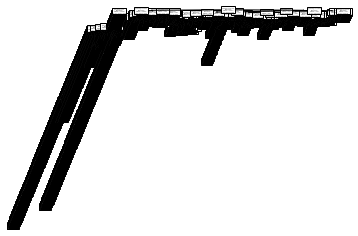

In [13]:
from sklearn.tree import plot_tree

plot_tree(clf)

C:\Users\rjgle\anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


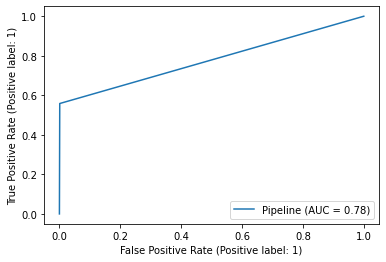

In [14]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dfc, test_x, test_y)
plt.show()

In [15]:
test_predict_Y=dfc.predict(test_x)
test_predict_Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix

#Calculate confusion matrix items
cm = confusion_matrix(test_y, test_predict_Y)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[552972    602]
 [   947   1198]]
False Positive Rates:  [947 602]
False Negative Rates:  [602 947]
True Positive Rates:  [552972   1198]
True Negative Rates:  [  1198 552972]


In [17]:
#Precision
from sklearn.metrics import precision_score

precision_score(test_y, test_predict_Y, average='micro')

0.9972126200471821

In [18]:
#Recall
from sklearn.metrics import recall_score

recall_score(test_y, test_predict_Y, average='micro')

0.9972126200471821

In [19]:
#F1 Score
from sklearn.metrics import f1_score

f1_score(test_y, test_predict_Y, average='micro')

0.9972126200471821

In [20]:
#MCC
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(test_y, test_predict_Y)

0.6083103184640651

In [21]:
#R2 Score
from sklearn.metrics import r2_score

r2_score(test_y, test_predict_Y)

0.2750572973050903

In [22]:
#Accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_y, test_predict_Y)

0.9972126200471821

In [23]:
#MAE Score
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_y, test_predict_Y)

0.002787379952817881

In [24]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=25, random_state=43)
rfc = make_pipeline(col_trans, rf_classifier)

In [25]:
rfc.fit(train_x, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['trans_date_trans_time',
                                                   'merchant', 'category',
                                                   'first', 'last', 'gender',
                                                   'street', 'city', 'state',
                                                   'job', 'dob',
                                                   'trans_num'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=25, random_state=43))])

C:\Users\rjgle\anaconda3\envs\bigdata\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


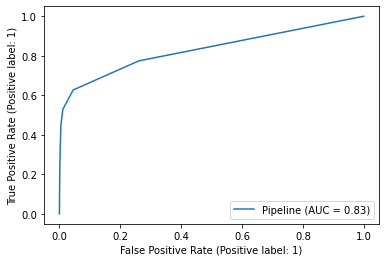

In [26]:
plot_roc_curve(rfc, test_x, test_y)
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid={'randomforestclassifier__max_depth':[3,5,7,10],'randomforestclassifier__max_features':["auto","sqrt","log2"]}
clf_hyper = GridSearchCV(rfc, param_grid, cv=10)

clf_hyper.fit(train_x, train_y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['trans_date_trans_time',
                                                                          'merchant',
                                                                          'category',
                                                                          'first',
                                                                          'last',
                                                                          'gender',
                                                                          'street',
                             

In [28]:
test_predict_Y=clf_hyper.predict(test_x)
test_predict_Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
plot_roc_curve(clf_hyper, test_x, test_y)

In [29]:
#Calculate confusion matrix items
cm = confusion_matrix(test_y, test_predict_Y)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[553574      0]
 [  2145      0]]
False Positive Rates:  [2145    0]
False Negative Rates:  [   0 2145]
True Positive Rates:  [553574      0]
True Negative Rates:  [     0 553574]


In [30]:
#Report best f1 score after hyper-paramter search
test_predict_Y=clf_hyper.predict(test_x)
f1_score(test_y, test_predict_Y, average='micro')

0.9961401355721147

In [31]:
#Precision
precision_score(test_y, test_predict_Y, average='micro')

0.9961401355721147

In [32]:
#Recall
recall_score(test_y, test_predict_Y, average='micro')

0.9961401355721147

In [33]:
#R2 Score
r2_score(test_y, test_predict_Y)

-0.003874820710510818

In [34]:
#Accuracy score
accuracy_score(test_y, test_predict_Y)

0.9961401355721147

In [35]:
#MAE Score
mean_absolute_error(test_y, test_predict_Y)

0.0038598644278853163

In [172]:
#Neural Network
df_train = pd.read_csv('fraudTrain.csv', nrows=100000)
df_test = pd.read_csv('fraudTest.csv', nrows=15000)

In [173]:
#Split data into train and test x and y
X_train = df_train[df_train.columns[0:-1]]
X_test = df_test[df_test.columns[0:-1]]
y_train = df_train['is_fraud']
y_test = df_test['is_fraud']

In [174]:
features_to_encode = X_train.columns[X_train.dtypes==object].tolist()
print(features_to_encode)
X_train = X_train.drop(features_to_encode, axis=1)
X_train = X_train.iloc[: , 1:] # Drop first column of dataframe
X_test = X_test.drop(features_to_encode, axis=1)
X_test = X_test.iloc[: , 1:] # Drop first column of dataframe

['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


In [175]:
#MinMax Scalar  
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
#X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

X_train

array([[5.41453976e-04, 3.10469873e-04, 2.78068733e-01, ...,
        0.00000000e+00, 3.56533555e-01, 8.48744117e-01],
       [1.14176199e-07, 8.30761073e-03, 9.93676796e-01, ...,
        5.13063179e-06, 6.32576122e-01, 4.86283930e-01],
       [7.77171158e-06, 1.71352781e-02, 8.32216877e-01, ...,
        6.51195575e-06, 5.06428461e-01, 5.46783793e-01],
       ...,
       [7.04913545e-04, 2.59637274e-03, 4.32840063e-01, ...,
        9.99967243e-01, 4.62872399e-01, 8.64212232e-01],
       [8.09258741e-01, 5.63929031e-03, 5.83724093e-01, ...,
        9.99974544e-01, 6.19475466e-01, 6.43373444e-01],
       [1.32120442e-03, 6.31888306e-04, 6.82357956e-02, ...,
        1.00000000e+00, 4.34361736e-01, 9.33204460e-01]])

In [292]:
import torch
import torch.nn as nn

class FraudTracker(nn.Module):
    def __init__(self, num_features):
        super(FraudTracker, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 20)
        self.batch_norm1 = nn.BatchNorm1d(20)
        self.dropout = nn.Dropout(p=0.2)
        self.layer_2 = nn.Linear(20, 10)
        self.batch_norm2 = nn.BatchNorm1d(10)
        self.layer_out = nn.Linear(10, 1)
        
        self.soft_max = nn.Softmax(1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        x = self.layer_1(inputs)
        x = self.batch_norm1(x)
        x = self.dropout(x)
        x = self.sigmoid(x)
        
        x = self.layer_2(x)
        x = self.batch_norm2(x)
        x = self.dropout(x)
        x = self.sigmoid(x)
        
        x = self.layer_out(x)
        x = self.sigmoid(x)
        #x = self.soft_max(x)
        
        return (x)
    
    def predict(self, test_inputs):
        x = self.layer_1(test_inputs)
        x = self.batch_norm1(x)
        x = self.sigmoid(x)
        
        x = self.layer2(x)
        x = self.batch_norm2(x)
        x = self.sigmoid(x)
        
        x = self.layer_out(x)
        x = self.sigmoid(x)
        #x = self.soft_max(x)
        return (x)

In [293]:
from torch.utils.data import Dataset, DataLoader 

class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

In [294]:
#Create Datasets
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [295]:
#Set parameters of training
EPOCHS = 100
BATCH_SIZE = 50
LEARNING_RATE = 1e-5
NUM_FEATURES = np.shape(X_train)[1]

In [296]:
#Create dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [297]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.version.cuda)

cuda:0
11.3


In [298]:
import torch.optim as optim

model = FraudTracker(NUM_FEATURES)
print(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

FraudTracker(
  (layer_1): Linear(in_features=9, out_features=20, bias=True)
  (batch_norm1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (layer_2): Linear(in_features=20, out_features=10, bias=True)
  (batch_norm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (soft_max): Softmax(dim=1)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)


In [299]:
def my_plot(epochs, loss):
    plt.plot(epochs, loss)
    plt.show()
    plt.savefig("loss_graph.png")

In [300]:
print("Beginning Training...")
loss_vals = []
correct = 0
acc_vals = []
for epoch in range(1, EPOCHS+1):
    # monitor training loss
    epoch_loss = []
    labels_list = []
    outputs_list = []

    #Training
    for data in train_loader:
        input, labels = data
        input.to(device)
        labels.to(device)
        optimizer.zero_grad()
        outputs = model(input)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels)
        epoch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
        labels_list = labels_list + labels.detach().numpy().tolist()
        outputs_list = outputs_list + outputs.detach().numpy().round().tolist()
    
    accuracy = accuracy_score(labels_list, outputs_list)    
    acc_vals.append(accuracy)
    loss_vals.append(sum(epoch_loss)/len(epoch_loss))
    if epoch % 10 == 0 or epoch == 1:  
        train_loss = loss.item()
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, sum(epoch_loss)/len(epoch_loss)))

Beginning Training...
Epoch: 1 	Training Loss: 0.537096
Epoch: 10 	Training Loss: 0.214933
Epoch: 20 	Training Loss: 0.084405
Epoch: 30 	Training Loss: 0.056537
Epoch: 40 	Training Loss: 0.051688
Epoch: 50 	Training Loss: 0.047407
Epoch: 60 	Training Loss: 0.044182
Epoch: 70 	Training Loss: 0.042393
Epoch: 80 	Training Loss: 0.041586
Epoch: 90 	Training Loss: 0.040860
Epoch: 100 	Training Loss: 0.040566


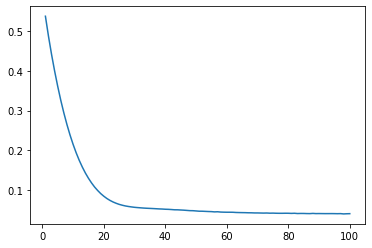

<Figure size 432x288 with 0 Axes>

In [303]:
my_plot(np.linspace(1, EPOCHS, EPOCHS).astype(int), loss_vals)
torch.save(model.state_dict(), "model.pth")


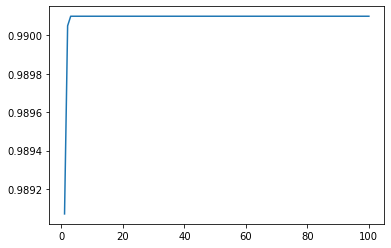

<Figure size 432x288 with 0 Axes>

In [304]:
my_plot(np.linspace(1, EPOCHS, EPOCHS).astype(int), acc_vals)

In [229]:
y_pred_list = []
with torch.no_grad():
    model.eval()
for X_batch, _ in test_loader:
     #X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    y_pred_list.append(y_test_pred.cpu().detach().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list] 
y_pred_list = np.asarray(y_pred_list)

In [230]:
mae = mean_absolute_error(y_test, y_pred_list)
f1 = f1_score(y_test, y_pred_list.round(), average='micro')
r2 = r2_score(y_test, y_pred_list.round())
accuracy = accuracy_score(y_test, y_pred_list.round())
print("Mean absolute error: ",mae)
print("F1 score: ",f1)
print("R2 score", r2)
print("Accuracy", accuracy)

Mean absolute error:  0.013994153616080682
F1 score:  0.9969333333333333
R2 score -0.003076100040123153
Accuracy 0.9969333333333333


In [231]:
#Calculate confusion matrix items
cm = confusion_matrix(y_test, y_pred_list.round())
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(cm)
print("False Positive Rates: ",FP)
print("False Negative Rates: ",FN)
print("True Positive Rates: ", TP)
print("True Negative Rates: ",TN)

[[14954     0]
 [   46     0]]
False Positive Rates:  [46  0]
False Negative Rates:  [ 0 46]
True Positive Rates:  [14954     0]
True Negative Rates:  [    0 14954]


In [302]:
import pickle

pickle.dump(dfc, open("dfc.sav", 'wb'))
pickle.dump(rfc, open("rfc.sav", 'wb'))
pickle.dump(clf_hyper, open("clf.sav", 'wb'))